#Multi person OPEN POSE NODE


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
z

In [4]:
import cv2
#protoFile = "/home/oscar/openpose/models/pose/mpi/pose_deploy_linevec.prototxt"
#weightsFile = "/home/oscar/openpose/models/pose/mpi/pose_iter_160000.caffemodel"
protoFile = "/home/roboworks/openpose/models/pose/body_25/pose_deploy.prototxt"
weightsFile = "/home/roboworks/openpose/models/pose/body_25/pose_iter_584000.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

/home/takeshi


In [11]:
# Read image
#frame = cv2.imread("group.jpeg")
frame = cv2.imread("download.jpeg")


# Specify the input image dimensions
inHeight = frame.shape[0]
inWidth = frame.shape[1]


# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

# Set the prepared object as the input blob of the network
net.setInput(inpBlob)



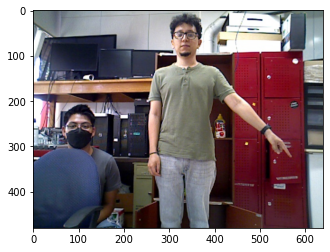

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
output = net.forward()

In [14]:
output.shape

(1, 78, 60, 80)

##Keypoint [0]  FACE. heat map

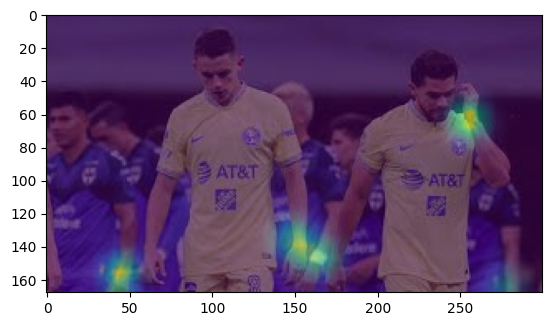

In [7]:
i = 7
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (inWidth, inHeight))



plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.imshow(probMap, alpha=0.6)

In [8]:
mapSmooth = cv2.GaussianBlur(probMap,(3,3),0,0)



In [9]:
_,mapMask = cv2.threshold(mapSmooth*256,125,255,cv2.THRESH_BINARY)

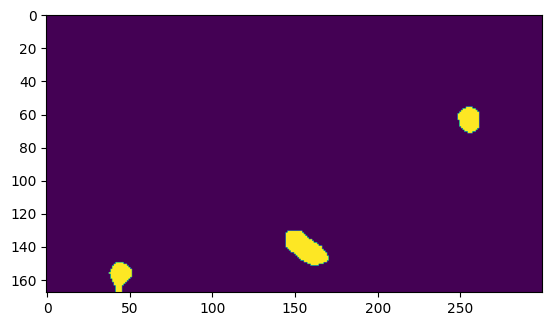

In [10]:
plt.imshow(mapMask) ##MASK WITH KEY POINTS 0

In [11]:
contours,_ = cv2.findContours(np.uint8(mapMask), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
len(contours)

3

In [13]:
output.shape

(1, 78, 21, 38)

In [14]:
keypoints=[]
for i in range (13):
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (inWidth, inHeight))
    mapSmooth = cv2.GaussianBlur(probMap,(3,3),0,0)
    _,mapMask = cv2.threshold(mapSmooth*256,125,255,cv2.THRESH_BINARY)
    contours,_ = cv2.findContours(np.uint8(mapMask), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        blobMask = np.zeros(mapMask.shape)
        blobMask = cv2.fillConvexPoly(blobMask, cnt, 1)
        maskedProbMap = mapSmooth * blobMask
        _, maxVal, _, maxLoc = cv2.minMaxLoc(maskedProbMap)
        keypoints.append(maxLoc + (probMap[maxLoc[1], maxLoc[0]],) +(i,))

In [15]:
keypoints

[(170, 82, 0.58207417, 0),
 (0, 67, 0.85674155, 0),
 (234, 52, 0.7826358, 0),
 (99, 43, 0.7970308, 0),
 (19, 91, 0.8565366, 1),
 (145, 84, 0.5900403, 1),
 (225, 68, 0.85791415, 1),
 (106, 59, 0.8787398, 1),
 (0, 92, 0.81360036, 2),
 (201, 68, 0.80029905, 2),
 (82, 60, 0.8520711, 2),
 (0, 124, 0.5155819, 3),
 (185, 108, 0.8040901, 3),
 (67, 101, 0.7288886, 3),
 (0, 148, 0.5195672, 4),
 (170, 147, 0.7462486, 4),
 (65, 140, 0.7531674, 4),
 (272, 107, 0.74941546, 5),
 (59, 84, 0.64228106, 5),
 (35, 90, 0.7532838, 5),
 (161, 84, 0.7952443, 5),
 (248, 67, 0.8047593, 5),
 (136, 59, 0.72497857, 5),
 (279, 139, 0.7614667, 6),
 (50, 123, 0.7629797, 6),
 (170, 116, 0.69018406, 6),
 (272, 99, 0.7959161, 6),
 (146, 99, 0.8119612, 6),
 (43, 156, 0.8017726, 7),
 (153, 139, 0.7060259, 7),
 (256, 61, 0.7735441, 7),
 (19, 155, 0.61672926, 8),
 (231, 148, 0.525128, 8),
 (106, 140, 0.6480626, 8),
 (10, 155, 0.55749553, 9),
 (216, 148, 0.59474885, 9),
 (91, 140, 0.64266515, 9),
 (264, 156, 0.55714554, 12),

In [17]:
#ejemplo candidatos de ser emparejados cuello y hombro (puntosclave cero y uno)
### SO cand a neck cand b shoulder
##KEYPOINTS 0 and 1

In [ ]:
output.shape

In [ ]:
output[0,1,0,0]  ## Just probs heat maps

In [ ]:
candA=[]
candB=[]
cand_a=6
cand_b=7
for keypoint in keypoints:
    if keypoint[-1]==cand_a :
        candA.append(keypoint[:2])
    if keypoint[-1]==cand_b :
        candB.append(keypoint[:2])
candA,candB

In [ ]:
#Cand A  has all the coords of necks
#Cand B  has all the coords of shoulders

In [ ]:
pafA = output[0, cand_a, :, :]
pafA=cv2.resize(pafA, (inWidth, inHeight))

pafB = output[0, cand_b, :, :]
pafB=cv2.resize(pafB, (inWidth, inHeight))

In [ ]:
paf= pafA+pafB
##Superposition of  heat maps
#PART AFFINITY MAPS
plt.imshow (paf)

In [ ]:
#Ejemplo de el primer punto 0 o cand A iterar sobre todos los candA'es

In [ ]:
d_ij = np.subtract(candB ,candA[0])

norm = np.linalg.norm(d_ij)
if norm:
    d_ij = d_ij / norm

In [ ]:
d_ij   ## Vectores unitarios entre el primer candidato A los candidatos B's

In [ ]:
interp_coord #10 puntos aleatorios en la linea entre el primer  candA  y Cand B

In [ ]:
paf_interp = []
for k in range(len(interp_coord)):
    paf_interp.append([pafA[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))],
                       pafB[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))] ])


In [ ]:
paf_interp

In [ ]:
paf_interp=np.asarray(paf_interp)

In [ ]:
# Find E
paf_scores=[]
for ij in range(len (d_ij)):
    paf_score = np.dot(paf_interp[:], d_ij[ij])
    paf_scores.append(np.linalg.norm(paf_score))
paf_scores=np.asarray(paf_scores)

In [ ]:
paf_scores.argmin()
#el mejor "pareo" es con el candB  arg min de paf scores



In [ ]:
skell_mask = cv2.line(skell_mask, candA[i], candB[paf_scores.argmin()], (255, 255, 255), 3)


# ACTUAL CODE

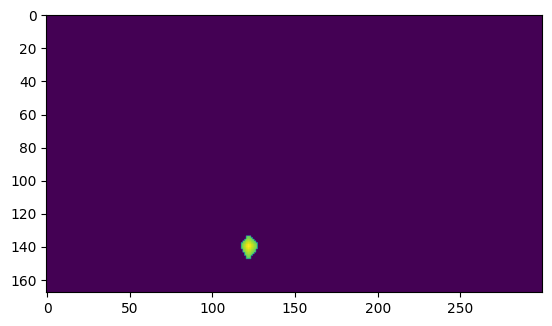

In [16]:
plt.imshow(maskedProbMap)

In [17]:
skell_mask=np.zeros(maskedProbMap.shape)

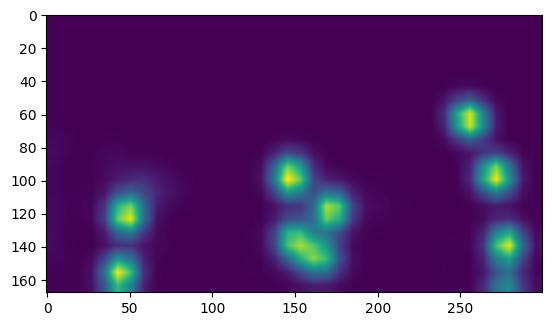

In [18]:
##MATCH AFFINITY BETWEEN ZEROS AND ONES

candA=[]
candB=[]
cand_a=7
cand_b=6
for keypoint in keypoints:
    if keypoint[-1]==cand_a :
        candA.append(keypoint[:2])
    if keypoint[-1]==cand_b :
        candB.append(keypoint[:2])
pafA = output[0, cand_a, :, :]
pafA=cv2.resize(pafA, (inWidth, inHeight))

pafB = output[0, cand_b, :, :]
pafB=cv2.resize(pafB, (inWidth, inHeight))
paf= pafA+pafB
##Superposition of  heat maps
#PART AFFINITY MAPS
plt.imshow (paf)

In [19]:
candB

[(279, 139), (50, 123), (170, 116), (272, 99), (146, 99)]

In [20]:
connect=[]
n_interp_samples=10
# Find p(u)

for i in range(len(candA)):
    
    d_ij = np.subtract(candB ,candA[i])

    norm = np.linalg.norm(d_ij)
    if norm:
        d_ij = d_ij / norm

    for j in range (len(candB)):
        interp_coord = list(zip(np.linspace(candA[i][0], candB[j][0], num=n_interp_samples),
        np.linspace(candA[i][1], candB[j][1], num=n_interp_samples)))
        paf_interp = []
        for k in range(len(interp_coord)):
            paf_interp.append([pafA[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))],
                               pafB[int(round(interp_coord[k][1])), int(round(interp_coord[k][0]))] ])
        paf_interp=np.asarray(paf_interp)
        # Find E
        paf_scores=[]
        for ij in range(len (d_ij)):
            paf_score = np.dot(paf_interp[:], d_ij[ij])
            paf_scores.append(np.linalg.norm(paf_score))
        paf_scores=np.asarray(paf_scores)
        print (paf_scores)
        if paf_scores.max()>0.35:
            skell_mask = cv2.line(skell_mask, candA[i], candB[paf_scores.argmin()], (255, 255, 255), 3)
            connect.append([candA[i] , candB[paf_scores.argmin()]])


[0.57679895 0.06818293 0.31962857 0.56970442 0.2753965 ]
[0.72275648 0.09319632 0.40155507 0.71468282 0.34900394]
[0.52368451 0.06209079 0.28869138 0.51520295 0.24793754]
[0.58114848 0.08682525 0.32732034 0.5796475  0.29094611]
[0.5264553  0.0732059  0.29508032 0.52363324 0.25964001]
[0.49625294 0.41136156 0.10675143 0.48788056 0.15069633]
[0.47693437 0.39493957 0.10637154 0.47287833 0.15100131]
[0.67816997 0.56977812 0.14263004 0.65115967 0.21632943]
[0.45879579 0.38342456 0.10735004 0.45375911 0.16127736]
[0.65296129 0.54277141 0.14671044 0.64500163 0.21296624]
[0.32345101 0.72131012 0.35784926 0.1621762  0.39220884]
[0.26733792 0.6031425  0.29836443 0.13410546 0.327851  ]
[0.21904688 0.6388604  0.29479852 0.11236177 0.34446556]
[0.34248658 0.89752834 0.42571922 0.17371089 0.48546325]
[0.24982101 0.62612303 0.30020402 0.12629254 0.33907026]


In [21]:
connect

[[(43, 156), (50, 123)],
 [(43, 156), (50, 123)],
 [(43, 156), (50, 123)],
 [(43, 156), (50, 123)],
 [(43, 156), (50, 123)],
 [(153, 139), (170, 116)],
 [(153, 139), (170, 116)],
 [(153, 139), (170, 116)],
 [(153, 139), (170, 116)],
 [(153, 139), (170, 116)],
 [(256, 61), (272, 99)],
 [(256, 61), (272, 99)],
 [(256, 61), (272, 99)],
 [(256, 61), (272, 99)],
 [(256, 61), (272, 99)]]

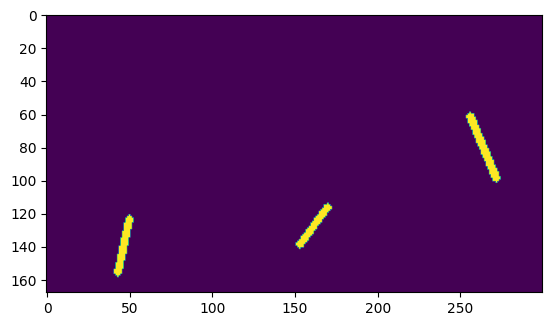

In [22]:
plt.imshow(skell_mask)

In [23]:
paf_scores.max()

0.6261230340970305

In [24]:
paf_scores
skell_mask = cv2.line(skell_mask, candA[i], candB[paf_scores.argmin()], (255, 255, 255), 3)


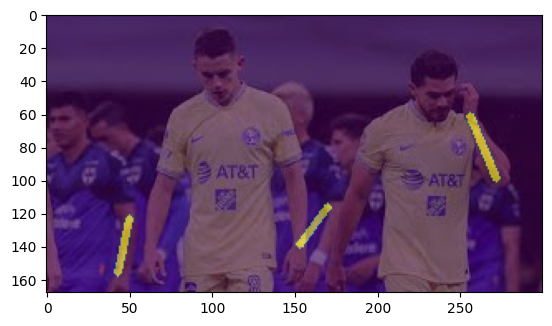

In [25]:
i = 0
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (inWidth, inHeight))



plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.imshow(skell_mask, alpha=0.6)

In [35]:
candB[paf_scores.argmin()]

(153, 139)